In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
flower=pd.read_csv('IRIS.csv')
flower.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
flower['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

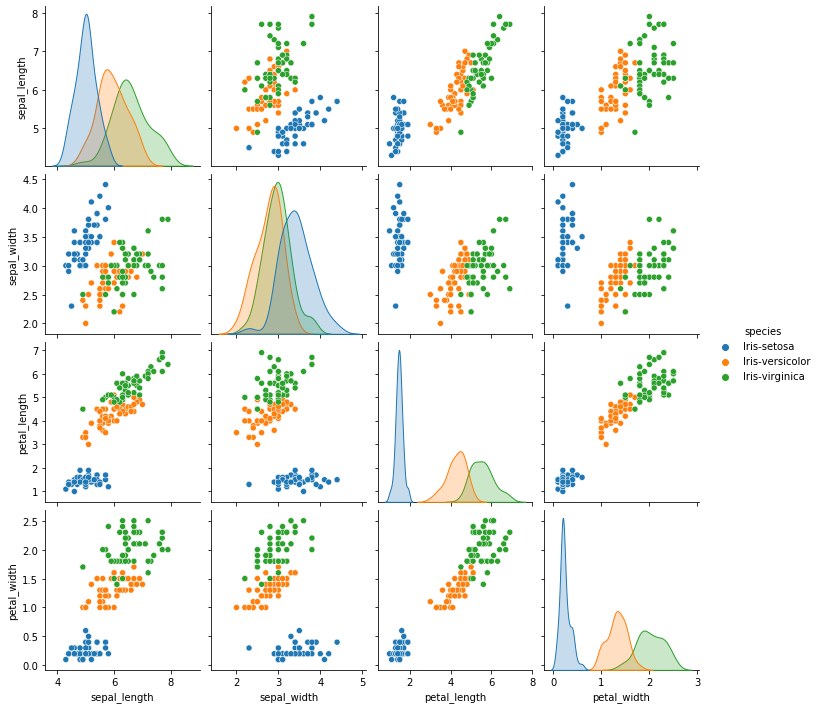

In [16]:
sns.pairplot(flower,hue='species')

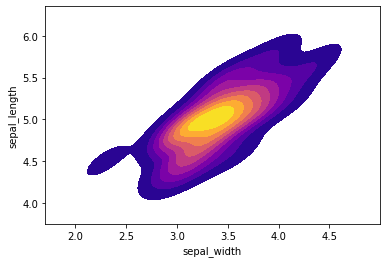

In [29]:
setosa=flower[flower['species']=='Iris-setosa']
# setosa.head()
sns.kdeplot(data=setosa,x=setosa['sepal_width'],y=setosa['sepal_length'],cmap='plasma',fill=True)

In [44]:
from sklearn.model_selection import train_test_split
X=flower.drop('species',axis=1)
y=flower['species']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=101)


In [51]:
from sklearn.svm import SVC
model=SVC()




In [55]:
model.fit(X_train,y_train)


SVC()

In [ ]:
predictions=model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [57]:
from sklearn.model_selection import GridSearchCV
param={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [61]:
grid=GridSearchCV(SVC(),param,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=2)

In [62]:
grid_pred=grid.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#getting same predicitons 

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

